<a href="https://colab.research.google.com/github/PraeJi/Predicting-Mental-Health/blob/main/PredictingMentalHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting mental health with machine learning**

# import

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Read dataset

In [ ]:
df = pd.read_excel("Mental Health.xlsx")
df.head()

In [ ]:
df.shape

(107, 24)



# Missing data


In [ ]:
df.isnull().sum()

อายุ                                                                                                        0
เพศ                                                                                                         0
ส่วนที่ 1 [ท่านรู้สึกเบื่อ ไม่สนใจอยากทำอะไร]                                                               0
ส่วนที่ 1 [ไม่สบายใจ ซึมเศร้า ท้อแท้]                                                                       0
ส่วนที่ 1 [หลับยากหรือหลับๆ ตื่นๆ]                                                                          0
ส่วนที่ 1 [เหนื่อยง่ายหรือไม่ค่อยมีแรง]                                                                     2
ส่วนที่ 1 [เบื่ออาหารหรือกินมากเกินไป]                                                                      2
ส่วนที่ 1 [รู้สึกไม่ดีกับตัวเองคิดว่าตัวเองล้มเหลวหรือครอบครัวผิดหวัง]                                      0
ส่วนที่ 1 [สมาธิไม่ดีเวลาทำอะไร เช่น ดูโทรทัศน์ ฟังวิทยุ หรือทำงานที่ต้องใช้ความตั้งใจ]                     0
ส่วนที่ 1 

In [ ]:
df = df.fillna(df.mode().iloc[0])

df.isnull().sum()

อายุ                                                                                                        0
เพศ                                                                                                         0
ส่วนที่ 1 [ท่านรู้สึกเบื่อ ไม่สนใจอยากทำอะไร]                                                               0
ส่วนที่ 1 [ไม่สบายใจ ซึมเศร้า ท้อแท้]                                                                       0
ส่วนที่ 1 [หลับยากหรือหลับๆ ตื่นๆ]                                                                          0
ส่วนที่ 1 [เหนื่อยง่ายหรือไม่ค่อยมีแรง]                                                                     0
ส่วนที่ 1 [เบื่ออาหารหรือกินมากเกินไป]                                                                      0
ส่วนที่ 1 [รู้สึกไม่ดีกับตัวเองคิดว่าตัวเองล้มเหลวหรือครอบครัวผิดหวัง]                                      0
ส่วนที่ 1 [สมาธิไม่ดีเวลาทำอะไร เช่น ดูโทรทัศน์ ฟังวิทยุ หรือทำงานที่ต้องใช้ความตั้งใจ]                     0
ส่วนที่ 1 

# ระดับคะแนนสุขภาพจิต (0-3)

In [ ]:
question_mapping = {"ไม่มีเลย": 0, "เป็นบางวัน (1-7 วัน)": 1, "เป็นบ่อย (>7 วัน)": 2, "เป็นทุกวัน": 3}

columns_to_encode = df.columns[2:22]
df[columns_to_encode] = df[columns_to_encode].replace(question_mapping)

df.head()

,อายุ,เพศ,ส่วนที่ 1 [ท่านรู้สึกเบื่อ ไม่สนใจอยากทำอะไร],ส่วนที่ 1 [ไม่สบายใจ ซึมเศร้า ท้อแท้],ส่วนที่ 1 [หลับยากหรือหลับๆ ตื่นๆ],ส่วนที่ 1 [เหนื่อยง่ายหรือไม่ค่อยมีแรง],ส่วนที่ 1 [เบื่ออาหารหรือกินมากเกินไป],ส่วนที่ 1 [รู้สึกไม่ดีกับตัวเองคิดว่าตัวเองล้มเหลวหรือครอบครัวผิดหวัง],ส่วนที่ 1 [สมาธิไม่ดีเวลาทำอะไร เช่น ดูโทรทัศน์ ฟังวิทยุ หรือทำงานที่ต้องใช้ความตั้งใจ],ส่วนที่ 1 [พูดช้า ทำอะไรช้าลงจนคนอื่นสังเกตเห็นได้หรือกระสับกระส่ายไม่สามารถอยู่นิ่งได้เหมือนที่เคยเป็น],...,ส่วนที่ 2 [ทำตัวให้ผ่อนคลายได้ยาก],ส่วนที่ 2 [รู้สึกกระสับกระส่ายจนไม่สามารถนั่งนิ่งๆ ได้],ส่วนที่ 2 [รู้สึกกลัวเหมือนว่าจะมีอะไรร้ายๆ เกิดขึ้น],ส่วนที่ 3 [มีปัญหาการนอน นอนไม่หลับหรือนอนมาก],ส่วนที่ 3 [มีสมาธิน้อยลง],ส่วนที่ 3 [หงุดหงิด / กระวนกระวาย / ว้าวุ้นใจ],ส่วนที่ 3 [รู้สึกเบื่อ เซ็ง],ส่วนที่ 3 [ไม่อยากพบปะผู้คน],ระดับเกรดเฉลี่ยของท่าน,ท่านมีความกังวลเรื่องใดมากที่สุด
0,19-21 ปี,หญิง,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,3.00 -​ 4.00,การเรียน
1,22-24 ปี,หญิง,1,1,1,2,2,2,3,2,...,1,1,2,1,2,2,2,1,2.00 -​ 2.99,การเงิน
2,19-21 ปี,LGBTQ+,1,2,2,1,2,2,2,1,...,2,1,2,1,1,1,1,1,3.00 -​ 4.00,การเรียน
3,19-21 ปี,หญิง,1,1,2,1,1,0,2,1,...,2,2,1,2,1,1,2,2,2.00 -​ 2.99,การเรียน
4,19-21 ปี,หญิง,3,2,1,3,1,2,1,1,...,1,1,1,1,1,2,3,1,3.00 -​ 4.00,การเรียน


# Encode (one-hot encoding)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

onehot = OneHotEncoder(sparse_output=True)

age_encoded = onehot.fit_transform(df['อายุ'].values.reshape(-1, 1))
age_nominals = pd.DataFrame(age_encoded.toarray(), columns=['13-15 ปี', '16-18 ปี', '19-21 ปี','22-24 ปี','25 ปีขึ้น'])

sex_encoded = onehot.fit_transform(df['เพศ'].values.reshape(-1, 1))
sex_nominals = pd.DataFrame(sex_encoded.toarray(), columns=['หญิง', 'ชาย', 'LGBTQ+'])

grade_encoded = onehot.fit_transform(df['ระดับเกรดเฉลี่ยของท่าน'].values.reshape(-1, 1))
grade_nominals = pd.DataFrame(grade_encoded.toarray(), columns=['0.00 -​ 1.99', '2.00 -​ 2.99', '3.00 -​ 4.00'])

concerns_encoded = onehot.fit_transform(df['ท่านมีความกังวลเรื่องใดมากที่สุด'].values.reshape(-1, 1))
concerns_nominals = pd.DataFrame(concerns_encoded.toarray(), columns=['การเรียน', 'ครอบครัว​', 'ความรัก','การเงิน','เพื่อน','อนาคตหลังเรียนจบ','ไม่สามารถระบุได้ มีหลายๆอย่างปนกัน'])

#_nominals.head()


# Outliner

In [ ]:
from sklearn.datasets import fetch_california_housing

df.plot(kind="box", subplots=True, layout=(5,5), figsize=(10,10))

In [ ]:

columns_to_plot = df.columns[2:22]

df_numeric = df[columns_to_plot]


Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
outliers_mask = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered = df[~outliers_mask]

df.plot(kind="box", subplots=True, layout=(5,5), figsize=(10,10))

# column สุขภาพจิตแต่ละประเภท (ซึมเศร้า,วิตกกังวล,เครียด)

In [ ]:
depression_threshold = 7
anxiety_threshold = 10
stress_threshold = 5

# Calculate mental health scores
df["depression"] = df.iloc[:, 2:11].sum(axis=1)
df["anxiety"] = df.iloc[:, 11:17].sum(axis=1)
df["stress"] = df.iloc[:, 17:22].sum(axis=1)

def determine_mental_health_type(row):
    if row["depression"] >= depression_threshold:
      depression = row["depression"]/9
    else:
      depression = 0
    if row["anxiety"] >= anxiety_threshold:
      anxiety = row["anxiety"]/6
    else:
      anxiety = 0
    if row["stress"] >= stress_threshold:
      stress = row["stress"]/5
    else:
      stress = 0
    mental = max(depression, anxiety, stress)
    if mental == 0:
      return "good"
    elif mental == depression:
      return "depression"
    elif mental == anxiety:
      return "anxiety"
    elif mental == stress:
      return "stress"

# Apply the function to each row
df["Mental Health"] = df.apply(determine_mental_health_type, axis=1)
df["Mental Health"]

0            good
1      depression
2      depression
3         anxiety
4          stress
          ...    
102    depression
103       anxiety
104        stress
105        stress
106        stress
Name: Mental Health, Length: 107, dtype: object

In [ ]:
label_encoder = LabelEncoder()
#df['Mental Health'] = label_encoder.fit_transform(df['Mental Health'])
df['อายุ'] = label_encoder.fit_transform(df['อายุ'])
df['เพศ'] = label_encoder.fit_transform(df['เพศ'])
df['ระดับเกรดเฉลี่ยของท่าน'] = label_encoder.fit_transform(df['ระดับเกรดเฉลี่ยของท่าน'])
df['ท่านมีความกังวลเรื่องใดมากที่สุด'] = label_encoder.fit_transform(df['ท่านมีความกังวลเรื่องใดมากที่สุด'])

In [ ]:
df.tail(50)

In [ ]:
df.shape

(107, 28)

# K-NN

In [ ]:
X = df.iloc[:, 0:-1]
y = df['Mental Health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

In [ ]:
predicted_random = knn.predict([[1,2,0,3,1,3,2,1,3,0,2,1,3,0,2,1,1,0,2,3,0,1,2,3,7,3,2]]) #good
predicted_random1 = knn.predict([[2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]) #good

predicted4 = knn.predict([[2,2,3,2,1,3,1,2,1,1,0,3,1,2,1,1,1,1,1,2,3,1,2,1,14,9,8]]) #true : anxiety
predicted1 = knn.predict([[3,2,1,1,1,2,2,2,3,2,2,1,1,1,1,1,2,1,2,2,2,1,1,0,16,7,8]]) #true : depression
predicted6 = knn.predict([[2,0,1,1,3,1,2,1,1,1,0,2,1,1,2,1,1,3,1,1,2,1,2,0,11,8,8]]) #true : stress
predicted10 = knn.predict([[1,0,3,1,0,2,1,1,1,2,0,1,2,1,1,1,0,2,2,3,3,1,2,2,11,6,11]]) #true : stress
predicted106 = knn.predict([[4,2,1,1,0,1,0,0,0,1,0,2,1,1,1,2,1,1,0,2,0,2,1,5,4,8,5]]) #true : stress
predicted102 = knn.predict([[2,2,1,1,2,2,3,0,1,1,0,1,0,2,0,0,0,1,1,1,1,1,2,0,11,3,5]]) #true : depression
predicted97 = knn.predict([[2,0,2,1,0,0,2,0,1,0,0,1,0,1,0,0,1,0,0,1,2,1,2,0,6,3,4]]) #true : good
predicted57 = knn.predict([[4,2,2,2,2,2,2,2,2,2,2,2,1,1,2,1,1,1,1,2,1,1,2,0,18,8,6]]) #true : depression
predicted68 = knn.predict([[2,2,1,1,1,1,2,1,3,1,3,3,2,1,3,1,2,2,1,2,1,2,2,2,14,12,8]]) #true : anxiety

print("Predicted Value:", predicted4)

Predicted Value: ['anxiety']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

# Confusion Matrix

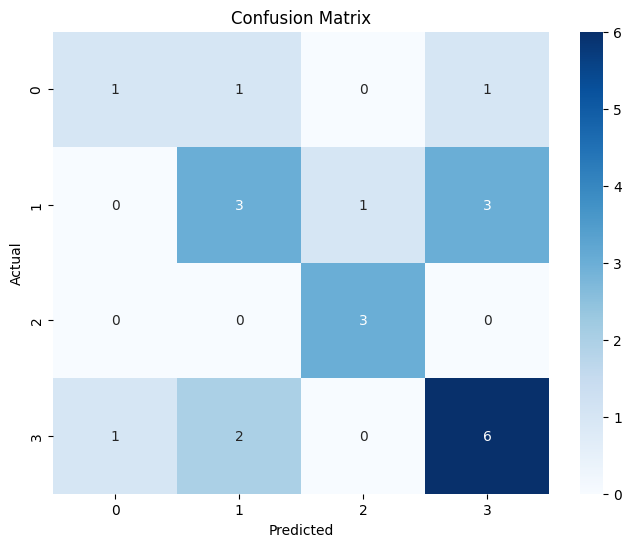

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Bar graph

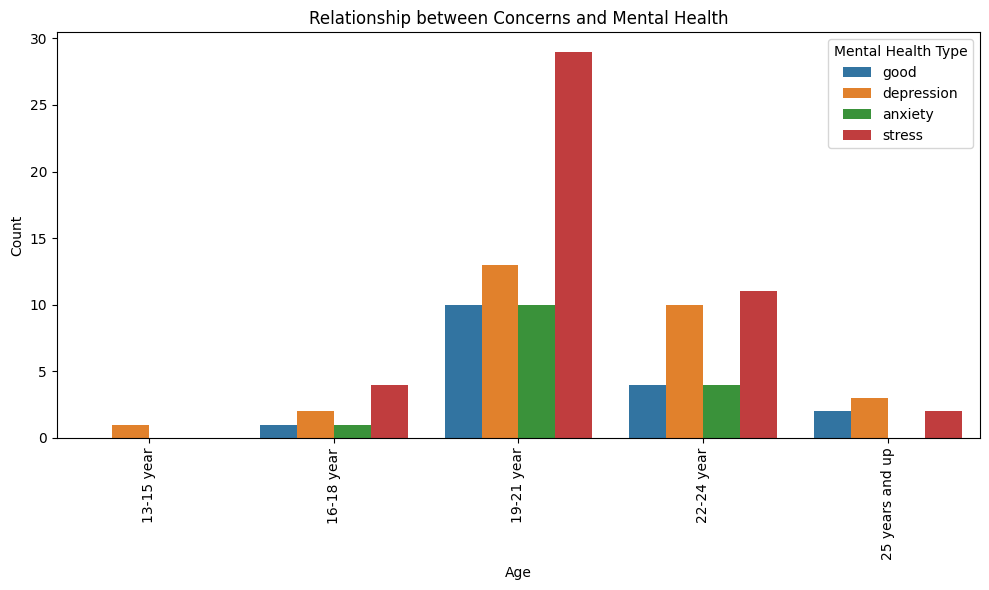

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom y-axis scale values and labels
custom_x_values = [0, 1, 2, 3, 4]  # Adjust these values as needed
custom_x_labels = ["13-15 year", "16-18 year", "19-21 year", "22-24 year", "25 years and up"]  # Labels corresponding to the scale values

# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="อายุ", hue="Mental Health", data=df)

# Customize the y-axis scale
ax.set_xticks(custom_x_values)
ax.set_xticklabels(custom_x_labels)

# Customize the plot
plt.title("Relationship between Concerns and Mental Health")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.legend(title="Mental Health Type", loc="upper right")
plt.tight_layout()
plt.show()

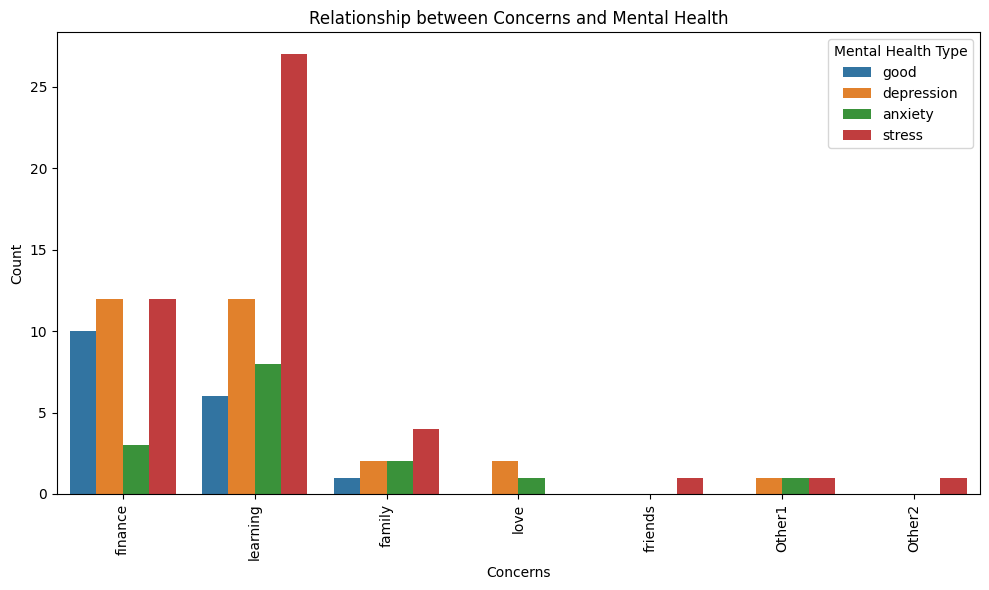

In [ ]:
# Define custom y-axis scale values and labels
custom_x_values = [0, 1, 2, 3, 4, 5, 6]  # Adjust these values as needed
custom_x_labels = ["finance", "learning", "family", "love", "friends", "Other1","Other2"]  # Labels corresponding to the scale values

# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="ท่านมีความกังวลเรื่องใดมากที่สุด", hue="Mental Health", data=df)

# Customize the y-axis scale
ax.set_xticks(custom_x_values)
ax.set_xticklabels(custom_x_labels)

# Customize the plot
plt.title("Relationship between Concerns and Mental Health")
plt.xlabel("Concerns")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.legend(title="Mental Health Type", loc="upper right")
plt.tight_layout()
plt.show()

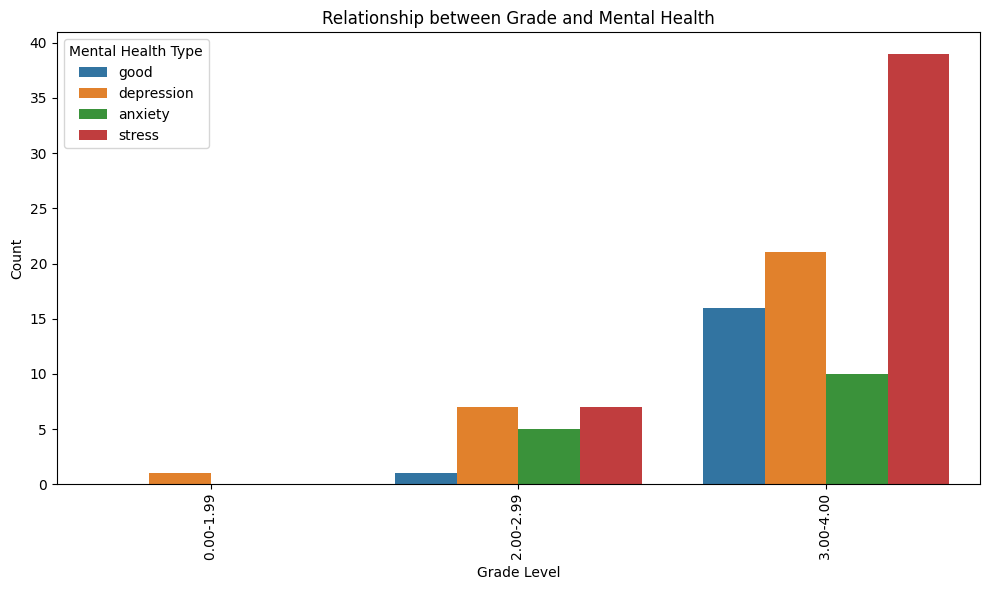

In [ ]:
# Define custom y-axis scale values and labels
custom_x_values = [0, 1, 2]  # Adjust these values as needed
custom_x_labels = ["0.00-​1.99", "2.00-​2.99", "3.00-​4.00"]  # Labels corresponding to the scale values

# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="ระดับเกรดเฉลี่ยของท่าน", hue="Mental Health", data=df)

# Customize the y-axis scale
ax.set_xticks(custom_x_values)
ax.set_xticklabels(custom_x_labels)

# Customize the plot
plt.title("Relationship between Grade and Mental Health")
plt.xlabel("Grade Level")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.legend(title="Mental Health Type", loc="upper left")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) mis

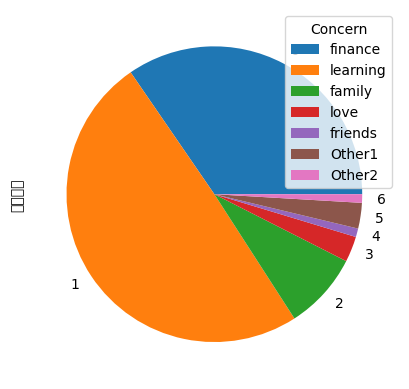

In [ ]:
df.groupby(['ท่านมีความกังวลเรื่องใดมากที่สุด'])['อายุ'].count().plot(kind='pie')

custom_labels = ['finance', 'learning', 'family', 'love', 'friends','Other1','Other2']
plt.legend(title="Concern",labels = custom_labels, loc="upper right")
